In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constantes
g = 9.8
L = 0.1

# Condiciones iniciales
theta0 = np.pi/12
w0 = 0
t = np.linspace(0, 5, 1000)

# Ecuación diferencial
def ec_dif(y, t, L, g):
    theta, w = y
    dtheta_dt = w
    dw_dt = ((2*g/L)-((w**2)*np.cos(theta))/(3+np.sin(theta)**2))*np.sin(theta)
    return [dtheta_dt, dw_dt]

# Solución de la ecuación diferencial
s=odeint(ec_dif, [theta0, w0], t, args=(L, g))
theta=s[:, 0]
w=s[:, 1]
y_= (L / 2) * np.cos(theta)  # Posición del centro de masa
x_ = (L / 2) * np.cos(theta)  # Posición del centro de masa en y

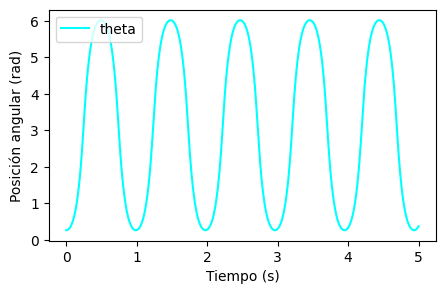

In [ ]:
#----------------------Posición angular---------------------------
plt.figure(figsize=(5, 3))
plt.plot(t, theta, label='theta', color='cyan')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición angular (rad)')
plt.legend(loc='upper left')

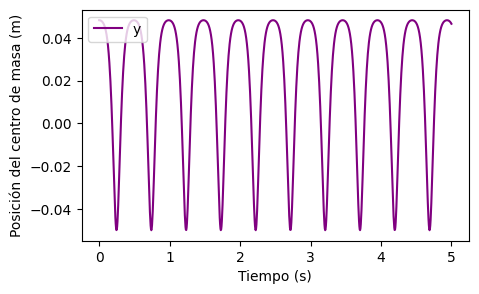

In [ ]:
#----------------------Posición del centro de masa-----------------
plt.figure(figsize=(5, 3))
plt.plot(t, y_, label='y', color='purple')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición del centro de masa (m)')
plt.legend(loc='upper left')

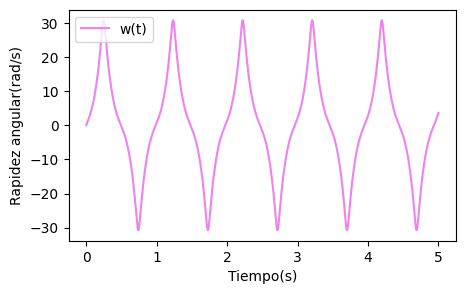

In [ ]:
#--------------------Rapidez angular-----------------------------
plt.figure(figsize=(5, 3))
plt.plot(t, w, label='w(t)', color='violet')
plt.xlabel('Tiempo(s)')
plt.ylabel('Rapidez angular(rad/s)')
plt.legend(loc='upper left')

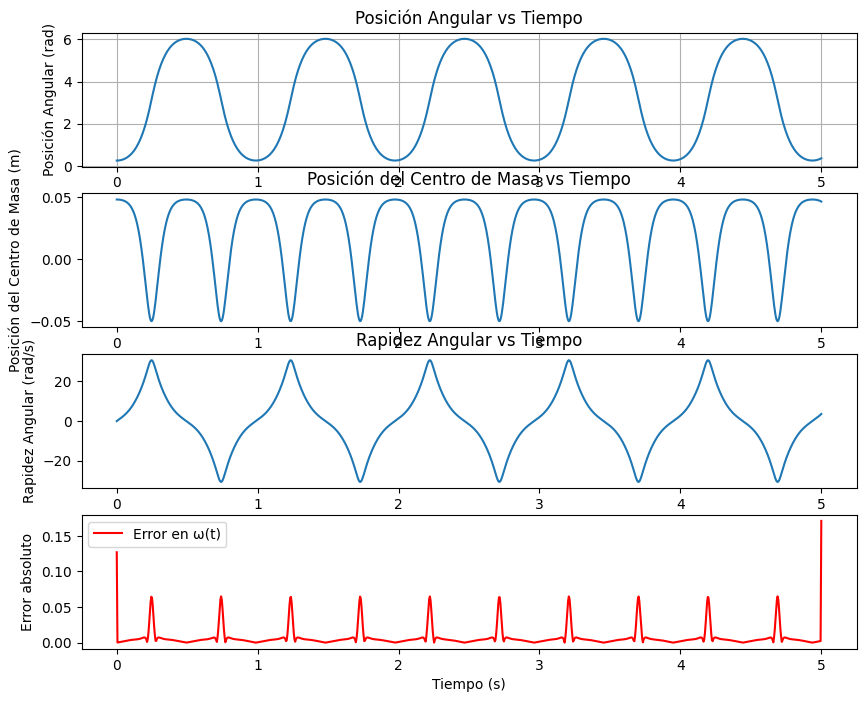

In [ ]:
# Graficar resultados
fig, axs = plt.subplots(4, 1, figsize=(10, 8))

#------------------------------Gráfico de la posición angular-----------------------------
axs[0].plot(t, theta, label=r'$\theta(t)$')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Posición Angular (rad)')
axs[0].set_title('Posición Angular vs Tiempo')
axs[0].grid(True)

#------------------------------Gráfico de la posición del centro de masa-------------------
axs[1].plot(t, x_, label=r'Posición del centro de masa $y(t)$')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Posición del Centro de Masa (m)')
axs[1].set_title('Posición del Centro de Masa vs Tiempo')

#-------------------------------Gráfico de la rapidez angular------------------------------
axs[2].plot(t, w, label=r'$\omega(t)$')
axs[2].set_xlabel('Tiempo (s)')
axs[2].set_ylabel('Rapidez Angular (rad/s)')
axs[2].set_title('Rapidez Angular vs Tiempo')
#-------------------------------Gráfico del error en w(t)----------------------------------
dtheta_dt_numerico = np.gradient(theta, t)
error_theta = np.abs(dtheta_dt_numerico - w)
axs[3].plot(t, error_theta, label='Error en ω(t)', color='r')
axs[3].set_ylabel('Error absoluto')
axs[3].set_xlabel('Tiempo (s)')
axs[3].legend()

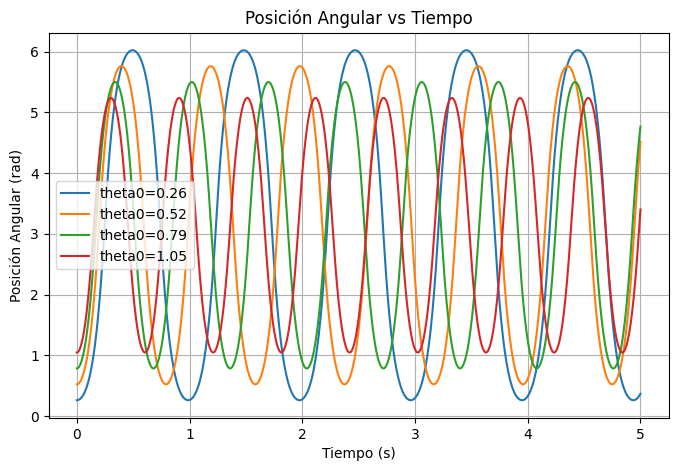

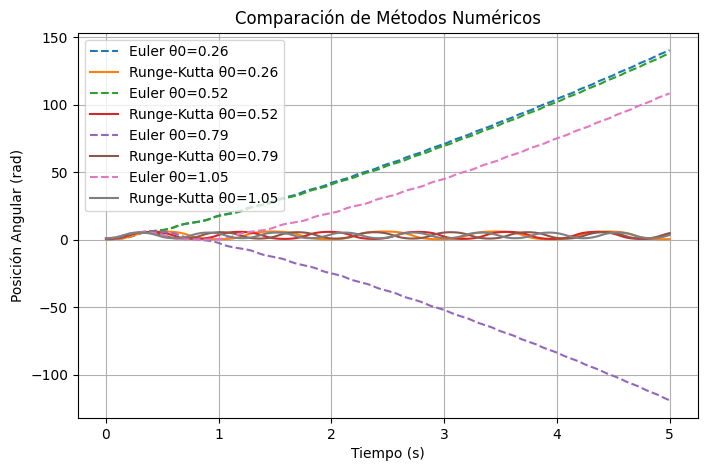

In [6]:
# Método de Euler
def euler(theta0, omega0, t, L, g):
    dt = t[1] - t[0]
    theta = np.zeros_like(t)
    w = np.zeros_like(t)
    theta[0] = theta0
    w[0] = w0

    for i in range(1, len(t)):
        dtheta_dt, dw_dt = ec_dif([theta[i-1], w[i-1]], t[i-1], L, g)
        theta[i] = theta[i-1] + dt * dtheta_dt
        w[i] = w[i-1] + dt * dw_dt

    return theta, w

# Método de Runge-Kutta de 4to orden
def runge_kutta(theta0, omega0, t, L, g):
    dt = t[1] - t[0]
    theta = np.zeros_like(t)
    w = np.zeros_like(t)
    theta[0] = theta0
    w[0] = w0

    for i in range(1, len(t)):
        k1 = np.array(ec_dif([theta[i-1], w[i-1]], t[i-1], L, g)) * dt
        k2 = np.array(ec_dif([theta[i-1] + 0.5 * k1[0], w[i-1] + 0.5 * k1[1]], t[i-1] + dt/2, L, g)) * dt
        k3 = np.array(ec_dif([theta[i-1] + 0.5 * k2[0], w[i-1] + 0.5 * k2[1]], t[i-1] + dt/2, L, g)) * dt
        k4 = np.array(ec_dif([theta[i-1] + k3[0], w[i-1] + k3[1]], t[i-1] + dt, L, g)) * dt

        theta[i] = theta[i-1] + (k1[0] + 2*k2[0] + 2*k3[0] + k4[0]) / 6
        w[i] = w[i-1] + (k1[1] + 2*k2[1] + 2*k3[1] + k4[1]) / 6

    return theta, w

# Valores iniciales de theta0
theta_0_values = [np.pi/12, np.pi/6, np.pi/4, np.pi/3]
t = np.linspace(0, 5, 1000)

plt.figure(figsize=(8, 5))
for theta0 in theta_0_values:
    y0 = [theta0, 0]
    sol = odeint(ec_dif, y0, t, args=(L, g))
    plt.plot(t, sol[:, 0], label=f'theta0={theta0:.2f}')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición Angular (rad)')
plt.title('Posición Angular vs Tiempo')
plt.legend()
plt.grid()
plt.show()

# Comparación entre Euler y Runge-Kutta
plt.figure(figsize=(8, 5))
for theta0 in theta_0_values:
    theta_euler, w_euler = euler(theta0, 0, t, L, g)
    theta_rk, w_rk = runge_kutta(theta0, 0, t, L, g)
    plt.plot(t, theta_euler, '--', label=f'Euler θ0={theta0:.2f}')
    plt.plot(t, theta_rk, label=f'Runge-Kutta θ0={theta0:.2f}')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición Angular (rad)')
plt.title('Comparación de Métodos Numéricos')
plt.legend()
plt.grid()
plt.show()


A medida que avanza el tiempo, la solución numérica con Euler tiende a volverse menos precisa más rápido en comparación con Runge-Kutta. Sin embargo, incluso este último método presenta diferencias con la solución teórica (conservación de la energía). Estas diferencias pueden deberse a errores acumulativos en la integración numérica o a la falta de ciertos efectos físicos en la ecuación diferencial.

In [ ]:
from scipy.integrate import quad

def tiempo_integral(theta_0):
    integrando = lambda theta: (1 / np.sqrt(1/3 + np.sin(theta)**2)) / np.sqrt(np.cos(theta_0) - np.cos(theta))
    integral, _ = quad(integrando, theta_0, np.pi / 2)
    return (1 / np.sqrt(g * L)) * integral

tiempos_integrales = [tiempo_integral(theta_0) for theta_0 in theta_0_values]

print(tiempos_integrales)


[4.648848229207152, 2.9126597899963858, 2.0028485250308914, 1.4115044391127198]


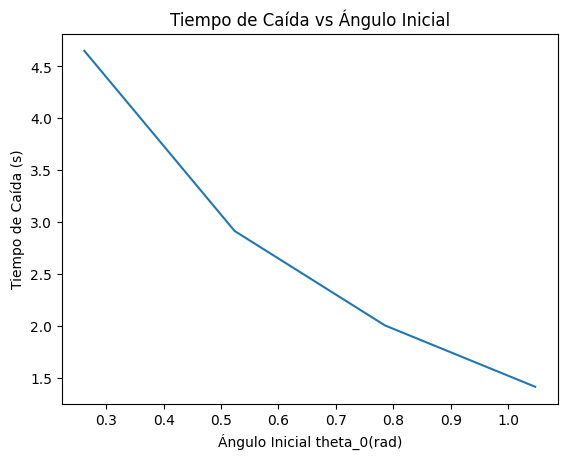

In [ ]:
plt.plot(theta_0_values, tiempos_integrales, label='Tiempo de caída (integral)')
plt.xlabel(r'Ángulo Inicial theta_0(rad)')
plt.ylabel('Tiempo de Caída (s)')
plt.title('Tiempo de Caída vs Ángulo Inicial')
plt.show()

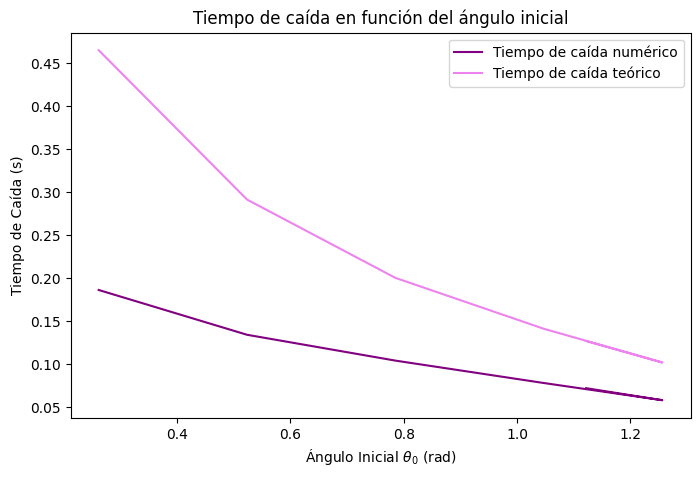

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, quad


# Valores iniciales de theta0
theta_0_values = np.array([np.pi/12, np.pi/6, np.pi/4, np.pi/3, np.pi/2.5, np.pi/2.8])


# Método de Euler para obtener tiempos numéricos
def tiempo_caida_numerico(theta0, L, g):
    t = np.linspace(0, 2, 1000)  # Tiempo de simulación
    y0 = [theta0, 0]
    sol = odeint(ec_dif, y0, t, args=(L, g))
    theta = sol[:, 0]
    idx = np.argmax(theta >= np.pi/2)
    return t[idx] if idx > 0 else np.nan

# Integral para el tiempo teórico de caída
def tiempo_caida_teorico(theta_0):
    integrando = lambda theta: (1 / np.sqrt(1/3 + np.sin(theta)**2)) / np.sqrt(np.cos(theta_0) - np.cos(theta))
    integral, _ = quad(integrando, theta_0, np.pi / 2)
    return (1 / np.sqrt(g / L)) * integral

# Calculamos tiempos de caída
tiempos_numericos = [tiempo_caida_numerico(theta0, L, g) for theta0 in theta_0_values]
tiempos_teoricos = [tiempo_caida_teorico(theta0) for theta0 in theta_0_values]

# Gráfica de comparación
plt.figure(figsize=(8, 5))
plt.plot(theta_0_values, tiempos_numericos, color='purple', label='Tiempo de caída numérico')
plt.plot(theta_0_values, tiempos_teoricos, color='violet', label='Tiempo de caída teórico')
plt.xlabel(r'Ángulo Inicial $\theta_0$ (rad)')
plt.ylabel('Tiempo de Caída (s)')
plt.title('Tiempo de caída en función del ángulo inicial')
plt.legend()
plt.show()


*Conclusiones*


    1. El tiempo de caída disminuye conforme el ángulo inicial θ₀ aumenta, ya que el lápiz empieza más inclinado y la componente de la gravedad en la dirección del movimiento es mayor.

    2. Para valores pequeños de θ₀, el tiempo de caída es mayor, lo que indica una aceleración más gradual del lápiz.

    3. Existe una buena correspondencia entre los valores numéricos y los obtenidos con la ecuación de conservación de la energía, validando el modelo utilizado.

    4. Para ángulos iniciales más grandes, la diferencia entre el modelo numérico y la ecuación de energía aumenta ligeramente, lo que puede ser debido a errores numéricos en la integración o interpolación.

In [ ]:
def matriz(theta):
    theta_rad=np.radians(theta)
    A = np.array([[np.cos(theta_rad), np.sin(theta_rad)],
                  [-np.sin(theta_rad), np.cos(theta_rad)]])
    return A
matriz(45)

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [ ]:
def autovalores(theta):
    theta_rad = np.radians(theta)
    a = 1
    b = -2 * np.cos(theta_rad)
    c = 1
    return np.roots([a, b, c])
autovalores(45)

array([0.70710678+0.70710678j, 0.70710678-0.70710678j])

In [ ]:
def autovectores(A):
    valores, vectores = np.linalg.eig(A)
    return valores, vectores

autovectores(matriz(45))

(array([0.70710678+0.70710678j, 0.70710678-0.70710678j]),
 array([[0.70710678+0.j        , 0.70710678-0.j        ],
        [0.        +0.70710678j, 0.        -0.70710678j]]))

In [ ]:
def matriz_diag(valores, vectores):
    D = np.diag(valores)  # Matriz diagonal con autovalores
    P = vectores  # Matriz de autovectores
    A_comprobado = np.dot(np.dot(P, D), np.linalg.inv(P))  # Verificación
    return D, P, A_comprobado

valores, vectores = autovectores(matriz(45))
D, P, A_comprobado = matriz_diag(valores, vectores)
print("\nComprobación P*D*P^-1:")
print(A_comprobado)



Comprobación P*D*P^-1:
[[ 0.70710678+2.29934717e-17j  0.70710678+0.00000000e+00j]
 [-0.70710678+0.00000000e+00j  0.70710678+2.29934717e-17j]]
